Случайная величина - эта величина принимает значение в результате внешних факторов

Дискретная случайная величина - принимает только конечное или счетное число значений

Непрерывная случайная величина - может принимать несчетное число значений

Распределение - полный перечень возможных значений случайной величины

Математическое ожидание - среднее значение случайной величины

Мода - самое частое значение случайной величины

Дисперсия - разброс значений

Стандартное отклонений - мера дисперсии(разброса) набора значений

Статистические гипотезы - это некоторые предположения о свойствах наших данных, которые необходимы проверить

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/town_1959_2.csv', encoding='cp1251', index_col=0)
df.head()

,город,население
номер,,
1,Москва,5046.0
2,Санкт-Петербург,3003.0
3,Нижний_Новгород,941.0
4,Новосибирск,885.0
5,Самара,806.0


In [ ]:
people = df['население']

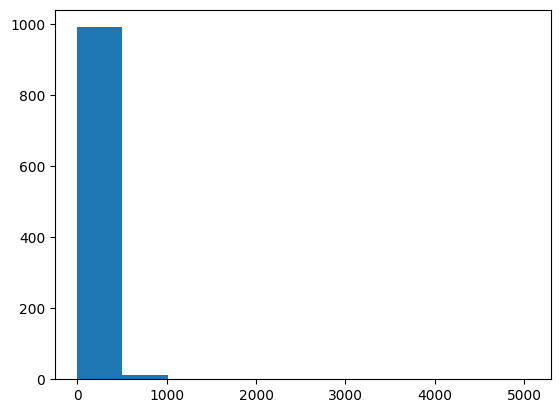

In [ ]:
plt.hist(people);

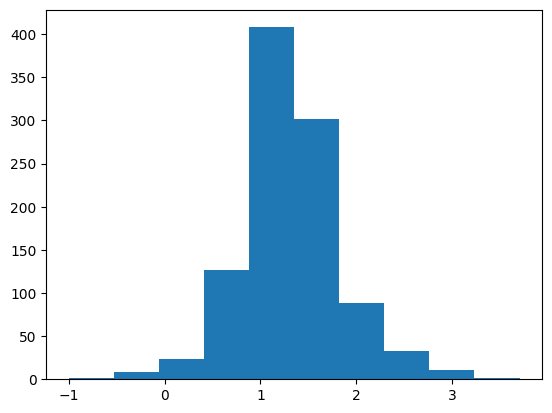

In [ ]:
plt.hist(np.log10(people));

In [ ]:
stats.shapiro(np.log10(people))

ShapiroResult(statistic=0.9746669504547727, pvalue=3.1499992999375674e-12)

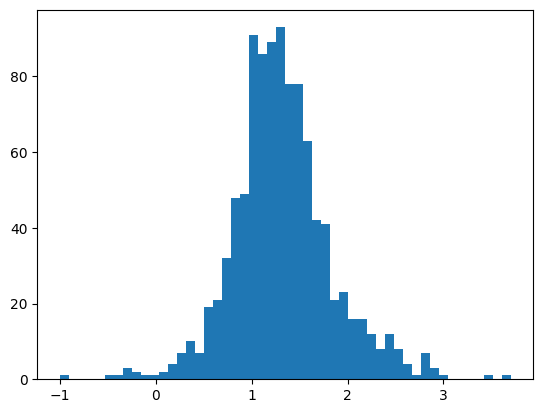

In [ ]:
plt.hist(np.log10(people),bins=50);

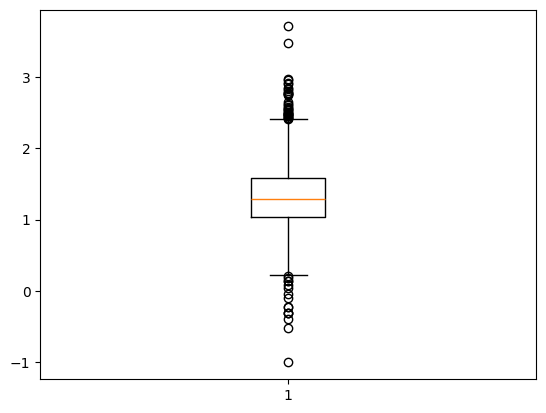

In [ ]:
plt.boxplot(np.log10(people));

In [ ]:
stats.kstest(people,'norm', args=(people.mean(), people.std()))

KstestResult(statistic=0.3982699424425235, pvalue=3.523202420401989e-144, statistic_location=0.1, statistic_sign=-1)

pvalue>0.05 - нулевую гипотезу отвергаем

Корреляция

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data/Albuquerque Home Prices_data.txt', sep = '\t')
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


In [3]:
df = df.replace(-9999,np.nan)
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


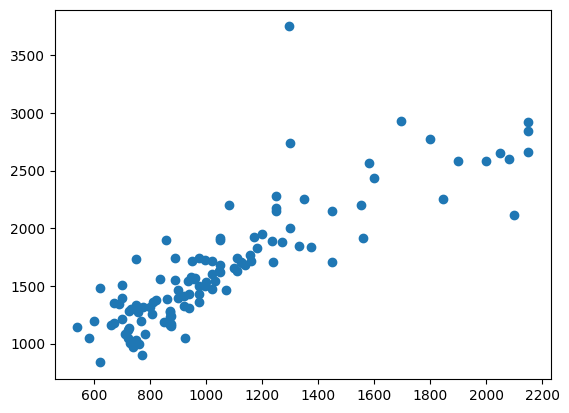

In [4]:
plt.scatter(df.PRICE,df.SQFT);

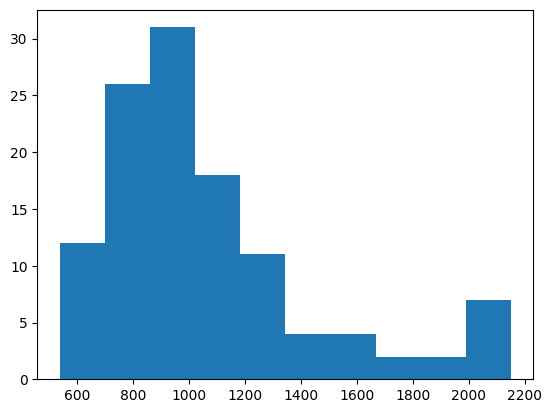

In [5]:
plt.hist(df.PRICE);

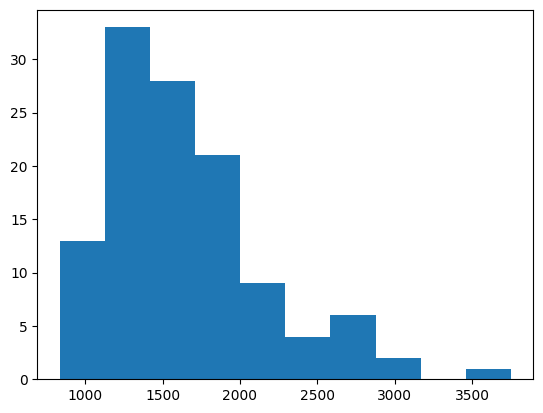

In [6]:
plt.hist(df.SQFT);

In [8]:
stats.shapiro(df.PRICE)

ShapiroResult(statistic=0.8615159114723168, pvalue=4.5609598458736375e-09)

In [9]:
stats.shapiro(df.SQFT)

ShapiroResult(statistic=0.9146823265992602, pvalue=1.5613717426141522e-06)

In [10]:
correlation = df['PRICE'].corr(df['SQFT'])
print (f'Корреляция Пирсона между ценой и площадью дома: {correlation}')

Корреляция Пирсона между ценой и площадью дома: 0.8447950985552116


In [11]:
stats.pearsonr(df.PRICE, df.SQFT)

PearsonRResult(statistic=0.8447950985552124, pvalue=5.146345707628998e-33)

In [12]:
df.corr()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
PRICE,1.000000,0.844795,-0.168679,0.420272,0.167840,0.555292,-0.079293,0.875665
SQFT,0.844795,1.000000,-0.039655,0.394925,0.145030,0.520102,0.040528,0.858583
AGE,-0.168679,-0.039655,1.000000,-0.187807,0.226763,-0.011850,0.136382,-0.291842
FEATS,0.420272,0.394925,-0.187807,1.000000,0.190016,0.241964,-0.041547,0.441730
NE,0.167840,0.145030,0.226763,0.190016,1.000000,0.043033,-0.077336,0.197418
CUST,0.555292,0.520102,-0.011850,0.241964,0.043033,1.000000,-0.003994,0.469922
COR,-0.079293,0.040528,0.136382,-0.041547,-0.077336,-0.003994,1.000000,-0.060006
TAX,0.875665,0.858583,-0.291842,0.441730,0.197418,0.469922,-0.060006,1.000000


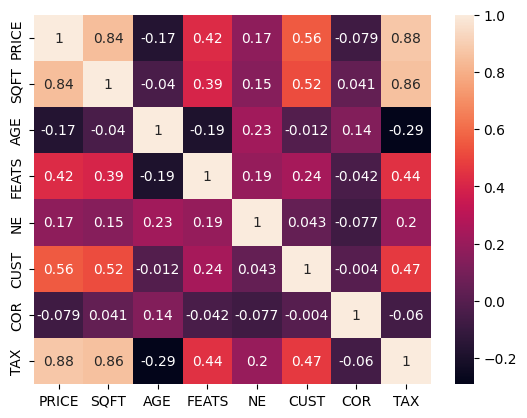

In [14]:
sns.heatmap(df.corr(), annot=True);

In [15]:
stats.spearmanr(df.PRICE,df.SQFT)

SignificanceResult(statistic=0.8741686749512637, pvalue=7.116503153899996e-38)

In [16]:
df.corr(method='spearman')

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
PRICE,1.000000,0.874169,-0.199493,0.407162,0.150592,0.468231,-0.023317,0.867649
SQFT,0.874169,1.000000,-0.014452,0.395759,0.157297,0.466412,-0.014897,0.861417
AGE,-0.199493,-0.014452,1.000000,-0.174851,0.266524,-0.048505,0.166389,-0.260791
FEATS,0.407162,0.395759,-0.174851,1.000000,0.170087,0.206473,-0.034871,0.425946
NE,0.150592,0.157297,0.266524,0.170087,1.000000,0.043033,-0.077336,0.136089
CUST,0.468231,0.466412,-0.048505,0.206473,0.043033,1.000000,-0.003994,0.409148
COR,-0.023317,-0.014897,0.166389,-0.034871,-0.077336,-0.003994,1.000000,-0.057141
TAX,0.867649,0.861417,-0.260791,0.425946,0.136089,0.409148,-0.057141,1.000000


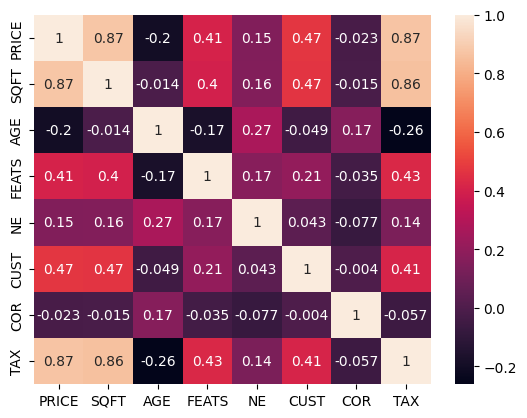

In [18]:
sns.heatmap(df.corr(method='spearman'),annot=True);